In [2]:
import pandas as pd
import numpy as np

# Number of samples
n_samples = 1000

# Generate income data
income = np.random.normal(50000, 15000, n_samples)  # Mean income of 50k, std dev 15k

# Generate age data
age = np.random.randint(25, 65, n_samples)

# Generate marital status (0: Single, 1: Married)
marital_status = np.random.choice([0, 1], n_samples)

# Create DataFrame
data = pd.DataFrame({'Income': income, 'Age': age, 'Marital_Status': marital_status})

# Simulate loan approval (adjust thresholds as needed)
data['Loan_Approved'] = np.where((data['Income'] > 40000) & (data['Age'] > 30) | 
                                (data['Marital_Status'] == 1), 1, 0)

# Add some noise (real-world data isn't perfectly predictable)
noise = np.random.rand(n_samples)
data['Loan_Approved'] = np.where(noise < 0.1, 1 - data['Loan_Approved'], data['Loan_Approved'])

data.head()

,Income,Age,Marital_Status,Loan_Approved
0,42644.893231,25,1,1
1,56064.765279,61,0,1
2,65515.833792,28,0,0
3,56843.730919,46,0,1
4,42143.895933,38,1,1


In [5]:
# import train_test_split
from sklearn.model_selection import train_test_split

X = data.drop('Loan_Approved', axis=1)
y = data['Loan_Approved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the parameter distribution
param_dist = {'n_estimators': randint(50, 200),
              'max_depth': [3, None],
              'min_samples_split': randint(2, 11)}

# Create a random forest classifier
rfc = RandomForestClassifier()

# Run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(rfc, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
print(random_search.best_params_)

{'max_depth': 3, 'min_samples_split': 8, 'n_estimators': 167}


Accuracy: 0.90
Precision: 0.89
Recall: 0.98
F1 Score: 0.93
[[ 32  18]
 [  3 147]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75        50
           1       0.89      0.98      0.93       150

    accuracy                           0.90       200
   macro avg       0.90      0.81      0.84       200
weighted avg       0.90      0.90      0.89       200



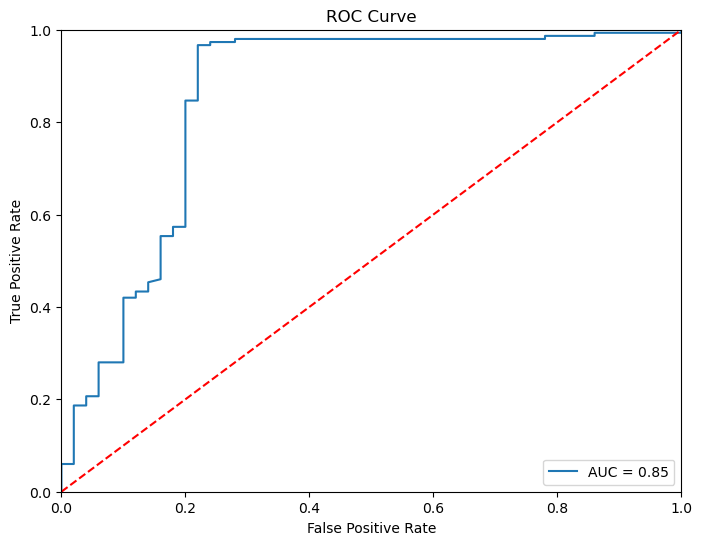

In [7]:
# make predictions and evaluate model with metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = random_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# import confusion_matrix
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# import classification_report
from sklearn.metrics import classification_report

# Create classification report
class_report = classification_report(y_test, y_pred)
print(class_report)

# import roc_curve and auc
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob = random_search.predict_proba(X_test)[:, 1]

# Create true and false positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

